<a href="https://colab.research.google.com/github/Fatimah007/Exercises-/blob/main/Copy_of_OCR_Using_CNN_exercise_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR Application Using CNN on MNIST Dataset


## Step 1: Import Libraries


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load and Preprocess the MNIST Dataset


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping and normalizing
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Step 3: Build the CNN Model


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 4: Compile and Train the Model


In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.1323 - loss: 2.2856 - val_accuracy: 0.3812 - val_loss: 2.2294
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.2441 - loss: 2.2231 - val_accuracy: 0.5605 - val_loss: 2.1496
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3625 - loss: 2.1440 - val_accuracy: 0.6478 - val_loss: 2.0407
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4389 - loss: 2.0411 - val_accuracy: 0.6802 - val_loss: 1.8969
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5113 - loss: 1.9049 - val_accuracy: 0.7048 - val_loss: 1.7155
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5570 - loss: 1.7376 - val_accuracy: 0.7306 - val_loss: 1.5083
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5943 - loss: 1.5558 - val_accuracy: 0.7572 - val_loss: 1.3028
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6221 - loss: 1.3909 - val_accuracy:

## Step 5: Visualizing Random Predictions from the Test Set


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


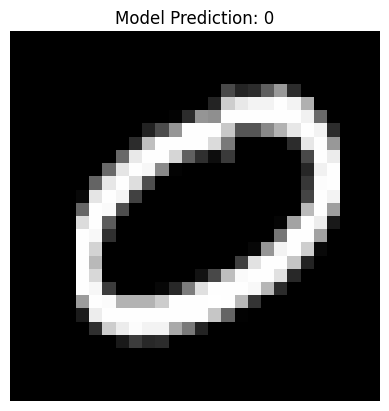

In [ ]:

# Select a random image
random_idx = random.randint(0, x_test.shape[0] - 1)
random_image = x_test[random_idx]

# Get the model's prediction
predicted_label = model.predict(random_image.reshape(1, 28, 28, 1)).argmax()

# Plot the image
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f'Model Prediction: {predicted_label}')
plt.axis('off')
plt.show()